# Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

## 1. Ridesharing Data

In [3]:
# Random 0.003% sample of entire 2019 dataset
df_003 = pd.read_csv("data/rideshare_003_clean.csv", compression="gzip", index_col=0)

In [4]:
df_003.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,date,trip_start_month,trip_start_weekday,trip_start_hour,trip_total_per_mile,trip_total_per_sec,shared_trip_auth_num
11025760,e5af9ebfe60312b7f5ee17b16f6d8ebb8533a52d,2019-02-08 10:15:00,2019-02-08 10:30:00,854.0,3.0,1.703124e+10,1.703184e+10,24.0,32.0,7.5,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-02-08 00:00:00,2,4,10,3.350000,0.011768,-1
24409345,e3e6e9f52cd800e77d96aa50e3bf4a71a19bcea2,2019-03-20 23:15:00,2019-03-20 23:30:00,793.0,7.6,1.703108e+10,1.703103e+10,8.0,77.0,12.5,...,41.994442,-87.665225,POINT (-87.6652247765 41.9944422482),2019-03-20 00:00:00,3,2,23,1.980263,0.018979,-1
66927329,f55fbbe4a9030e0845fe53e51d4c6b059816b1f1,2019-08-05 07:30:00,2019-08-05 07:30:00,482.0,3.2,1.703184e+10,1.703135e+10,28.0,35.0,10.0,...,41.827400,-87.624089,POINT (-87.624088952 41.8274002516),2019-08-05 00:00:00,8,0,7,3.125000,0.020747,1
59895375,909b68e8f1f272030bce6e80007fed64cc6ed09b,2019-07-13 17:30:00,2019-07-13 18:00:00,2138.0,9.4,NaN,NaN,10.0,24.0,20.0,...,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),2019-07-13 00:00:00,7,5,17,2.398936,0.010547,-1
36585538,35acebf373a2d87210e62806a58a8b85d31d675c,2019-04-29 07:45:00,2019-04-29 07:45:00,403.0,0.8,1.703128e+10,1.703184e+10,28.0,32.0,10.0,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-04-29 00:00:00,4,0,7,15.687500,0.031141,-1


In [5]:
df_003.columns

Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tip',
       'additional_charges', 'trip_total', 'shared_trip_authorized',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location', 'date',
       'trip_start_month', 'trip_start_weekday', 'trip_start_hour',
       'trip_total_per_mile', 'trip_total_per_sec', 'shared_trip_auth_num'],
      dtype='object')

In [6]:
# Summary statistics
df_003.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,...,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,trip_start_month,trip_start_weekday,trip_start_hour,trip_total_per_mile,trip_total_per_sec,shared_trip_auth_num
count,287763.000000,287763.000000,2.230440e+05,2.230440e+05,287532.000000,287515.000000,287763.000000,287763.000000,287763.000000,287763.000000,...,287763.000000,287763.000000,287763.000000,287763.000000,287763.000000,287763.000000,287763.000000,287763.000000,287763.000000,287763.000000
mean,989.565014,4.909376,1.703136e+10,1.703137e+10,24.542555,25.182557,10.261291,0.537494,2.769689,13.568475,...,41.892033,-87.661819,41.892808,-87.663909,6.490282,3.213509,13.790904,4.312681,0.016208,-0.619548
std,677.996592,4.753986,3.275248e+05,3.327801e+05,19.293870,19.774223,7.336976,1.459972,1.653168,8.837406,...,0.058817,0.054856,0.059015,0.059424,3.440361,1.945994,6.297977,3.404277,0.017794,0.784960
min,3.000000,0.100000,1.703101e+10,1.703101e+10,1.000000,1.000000,2.500000,0.000000,0.000000,3.170000,...,41.650222,-87.913625,41.650222,-87.913625,1.000000,0.000000,0.000000,0.248139,0.000925,-1.000000
25%,517.000000,1.700000,1.703108e+10,1.703108e+10,8.000000,8.000000,5.000000,0.000000,2.550000,7.550000,...,41.877406,-87.675312,41.878667,-87.676356,3.000000,2.000000,9.000000,2.324074,0.011623,-1.000000
50%,817.000000,3.300000,1.703124e+10,1.703124e+10,24.000000,24.000000,7.500000,0.000000,2.550000,10.050000,...,41.893216,-87.649907,41.893216,-87.649907,6.000000,3.000000,15.000000,3.420455,0.014689,-1.000000
75%,1263.000000,6.200000,1.703183e+10,1.703183e+10,32.000000,32.000000,12.500000,0.000000,2.550000,15.050000,...,41.928619,-87.630964,41.929047,-87.630964,10.000000,5.000000,19.000000,5.392857,0.019034,-1.000000
max,5398.000000,74.700000,1.703198e+10,1.703198e+10,77.000000,77.000000,97.500000,50.000000,22.650000,139.600000,...,42.021224,-87.534903,42.021224,-87.530712,12.000000,6.000000,23.000000,348.500000,4.375000,1.000000


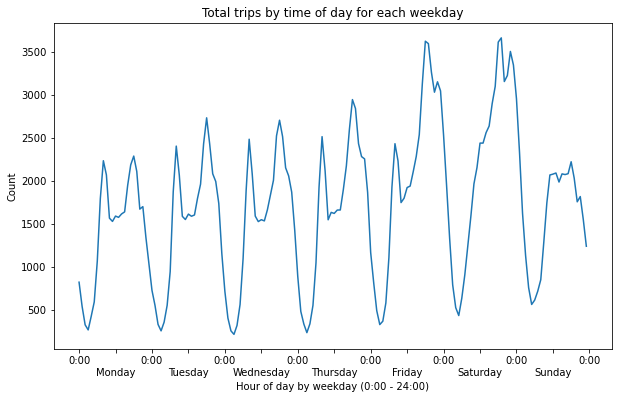

In [8]:
grouped1 = df_003.groupby(['trip_start_weekday', 'trip_start_hour'])["trip_id"].count()

fig, ax = plt.subplots()
fig = grouped1.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Count")
plt.title("Total trips by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

**Add analysis of graph above**

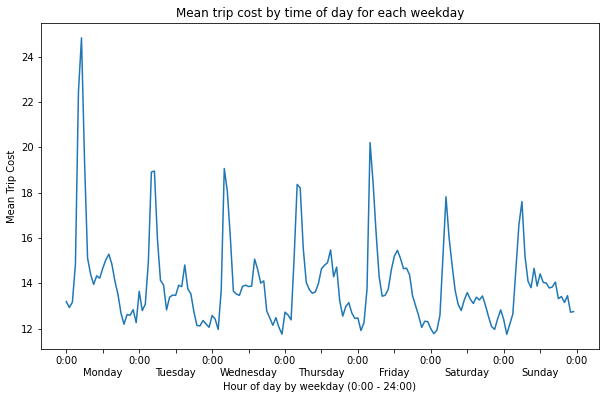

In [10]:
grouped2 = df_003.groupby(['trip_start_weekday', 'trip_start_hour'])["trip_total"].mean()

fig, ax = plt.subplots()
fig = grouped2.plot(figsize=(10, 6))
plt.xlabel("Hour of day by weekday (0:00 - 24:00)")
plt.ylabel("Mean Trip Cost")
plt.title("Mean trip cost by time of day for each weekday")
ax.set_xticks(np.arange(0, 169, 12))
labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
          "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
ax.set_xticklabels(labels)
plt.show()

**Add analysis of graph above**

In [169]:
grouped3 = df_003.groupby(['pickup_community_area'])["trip_total_per_mile"].mean()

In [170]:
grouped3 = grouped3.reset_index()

In [171]:
print("Top 10 Pickup Community Areas with Highest Mean Trip Total Per Mile")
grouped3.sort_values('trip_total_per_mile', ascending=False)[:10]

Top 10 Pickup Community Areas with Highest Mean Trip Total Per Mile


,pickup_community_area,trip_total_per_mile
7,8.0,5.494010
31,32.0,5.225260
32,33.0,4.699874
27,28.0,4.618136
6,7.0,4.401069
23,24.0,4.234477
5,6.0,4.218082
61,62.0,3.999611
4,5.0,3.941802
21,22.0,3.922533


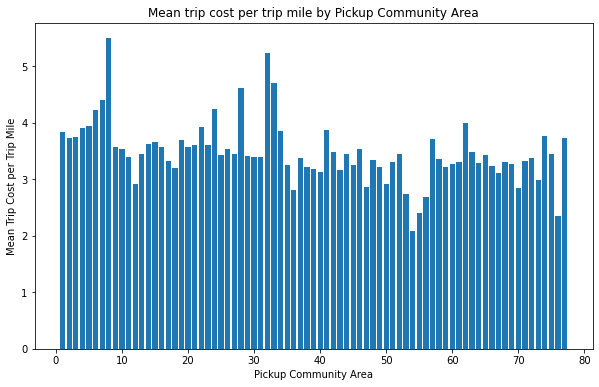

In [173]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(grouped3["pickup_community_area"], grouped3["trip_total_per_mile"])
plt.xlabel("Pickup Community Area")
plt.ylabel("Mean Trip Cost per Trip Mile")
plt.title("Mean trip cost per trip mile by Pickup Community Area")
# plt.xlabel()
# ax.set_xticks([])
# labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
#           "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
# ax.set_xticklabels(labels)
plt.show()

In [174]:
grouped4 = df_003.groupby(['pickup_community_area'])["trip_total_per_sec"].mean()

In [175]:
grouped4 = grouped4.reset_index()

In [176]:
print("Top 10 Pickup Community Areas with Highest Mean Trip Total Per Second")
grouped4.sort_values('trip_total_per_sec', ascending=False)[:10]

Top 10 Pickup Community Areas with Highest Mean Trip Total Per Second


,pickup_community_area,trip_total_per_sec
50,51.0,0.022868
72,73.0,0.021671
73,74.0,0.020457
62,63.0,0.020063
8,9.0,0.018897
74,75.0,0.018719
9,10.0,0.018388
75,76.0,0.017981
32,33.0,0.017871
55,56.0,0.017781


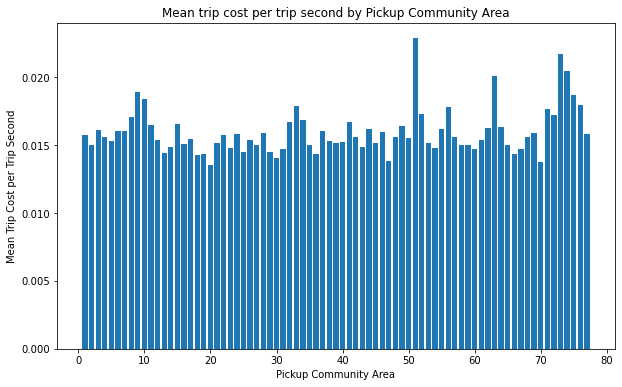

In [177]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(census_grouped_sec["pickup_community_area"], census_grouped_sec["trip_total_per_sec"])
plt.xlabel("Pickup Community Area")
plt.ylabel("Mean Trip Cost per Trip Second")
plt.title("Mean trip cost per trip second by Pickup Community Area")
# ax.set_xticks([])
# labels = ["0:00",'\n'+'Monday',"0:00", '\n'+'Tuesday',"0:00", '\n'+'Wednesday',"0:00", '\n'+'Thursday', 
#           "0:00",'\n'+'Friday', "0:00",'\n'+'Saturday',"0:00", '\n'+'Sunday', "0:00"]
# ax.set_xticklabels(labels)
plt.show()

### Merging with Community Area Data

In [80]:
# join on pickup lat/long
cmap = gpd.read_file("data/community_area/com_cmap.shp")
gdf_pickup = gpd.GeoDataFrame(df_003, geometry=gpd.points_from_xy(df_003["pickup_centroid_longitude"], 
                                                       df_003["pickup_centroid_latitude"]), crs="EPSG:4326")
gdf_cmap = gpd.sjoin(gdf_pickup, cmap, op='within')

/Users/michelleorden/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [90]:
# rename columns 28-67 to specify _pickup
gdf_cmap = gdf_cmap.rename(mapper={col:col+ "_pickup" for col in list(gdf_cmap.columns[28:])}, axis=1)

In [96]:
# join on dropoff lat/long
gdf_dropoff = gpd.GeoDataFrame(gdf_cmap, geometry=gpd.points_from_xy(gdf_cmap["dropoff_centroid_longitude"], 
                                                       gdf_cmap["dropoff_centroid_latitude"]), crs="EPSG:4326")
gdf_cmap = gpd.sjoin(gdf_dropoff, cmap, op='within')

/Users/michelleorden/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [103]:
# rename columns 68-108 to specify _pickup
gdf_cmap = gdf_cmap.rename(mapper={col:col+ "_dropoff" for col in list(gdf_cmap.columns[68:])}, axis=1)

### More Visualizations

In [57]:
! pip install mapclassify

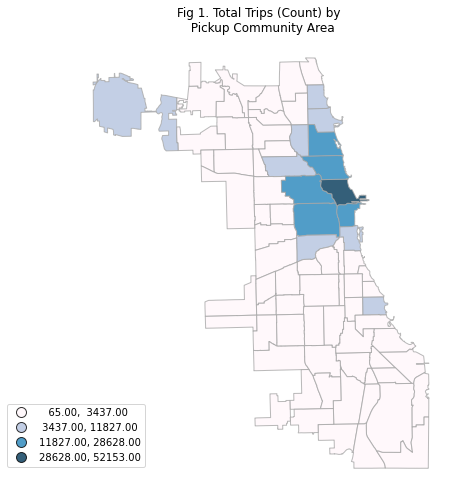

In [140]:
ride_count = gdf_cmap.groupby('area_num_pickup')["trip_id"].count().to_frame('total_trips').reset_index()
vars_by_geoid = cmap.merge(ride_count, left_on="area_num", right_on="area_num_pickup", how="outer")

fig = vars_by_geoid.plot(column='total_trips',
                         cmap = 'PuBu',
                         figsize=(11,7),   
                         scheme='natural_breaks', k=4, 
                         legend = True,
                         edgecolor='darkgrey',
                         alpha=0.8)
fig.set_title('Fig 1. Total Trips (Count) by \n Pickup Community Area', fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

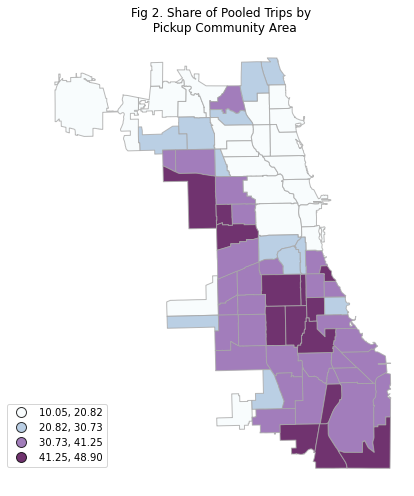

In [141]:
pooled_trips = gdf_cmap.groupby('area_num_pickup')['shared_trip_authorized'].mean().to_frame('avg_shared_trips').reset_index()
pooled_trips["avg_shared_trips"] = pooled_trips["avg_shared_trips"] * 100
vars_by_geoid = vars_by_geoid.merge(pooled_trips, left_on="area_num", right_on="area_num_pickup", how="outer")

fig = vars_by_geoid.plot(column='avg_shared_trips',
                                cmap = 'BuPu',
                                figsize=(11,7),   
                                scheme='natural_breaks', k=4, 
                                legend = True,
                                edgecolor='darkgrey',
                                alpha=0.8)
fig.set_title('Fig 2. Share of Pooled Trips by \n Pickup Community Area', 
              fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

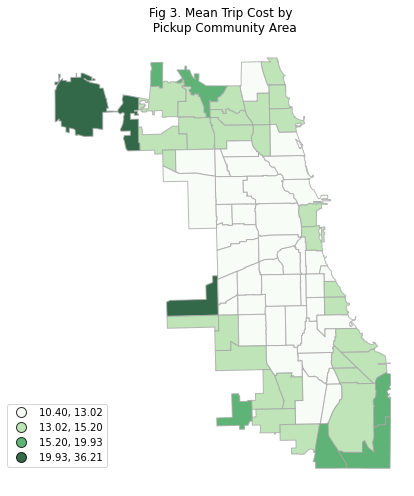

In [142]:
avg_cost = gdf_cmap.groupby('area_num_pickup')['trip_total'].mean().to_frame('avg_trip_cost').reset_index()
vars_by_geoid = vars_by_geoid.merge(avg_cost, left_on="area_num", right_on="area_num_pickup", how="outer")

fig = vars_by_geoid.plot(column='avg_trip_cost',
                                cmap = 'Greens',
                                figsize=(11,7),   
                                scheme='natural_breaks', k=4, 
                                legend = True,
                                edgecolor='darkgrey',
                                alpha=0.8)
fig.set_title('Fig 3. Mean Trip Cost by \n Pickup Community Area', 
              fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [156]:
avg_tot_per_mile = gdf_cmap.groupby('area_num_pickup')['trip_total_per_mile'].mean().to_frame('trip_tot_per_mile').reset_index()

In [157]:
vars_by_geoid = vars_by_geoid.merge(avg_tot_per_mile, left_on="area_num", right_on="area_num_pickup", how="outer")

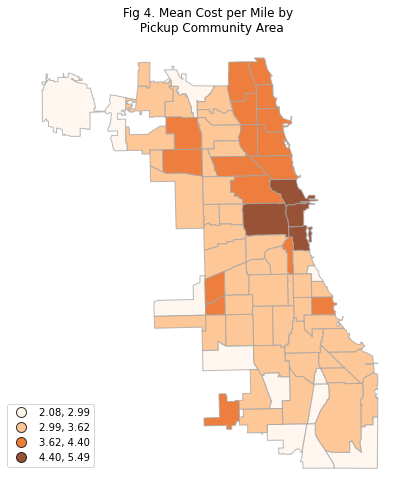

In [158]:
fig = vars_by_geoid.plot(column='trip_tot_per_mile',
                               cmap = 'Oranges',
                               figsize=(11,7),   
                               scheme='natural_breaks', k=4, 
                               legend = True,
                               edgecolor='darkgrey',
                               alpha=0.8)
fig.set_title('Fig 4. Mean Cost per Mile by \n Pickup Community Area', 
             fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()

In [164]:
avg_tot_per_min = gdf_cmap.groupby('area_num_pickup')['trip_total_per_sec'].mean().to_frame('trip_total_per_min').reset_index()

In [165]:
vars_by_geoid = vars_by_geoid.merge(avg_tot_per_min, left_on="area_num", right_on="area_num_pickup", how="outer")

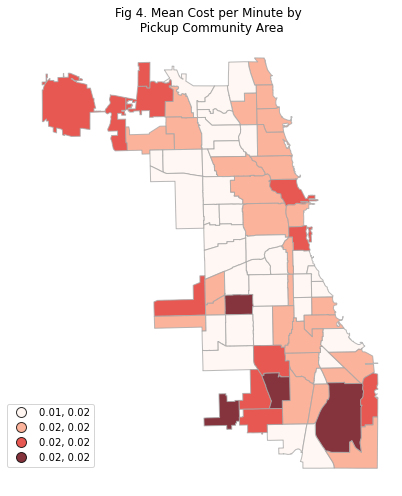

In [166]:
fig = vars_by_geoid.plot(column='trip_total_per_min',
                               cmap = 'Reds',
                               figsize=(11,7),   
                               scheme='natural_breaks', k=4, 
                               legend = True,
                               edgecolor='darkgrey',
                               alpha=0.8)
fig.set_title('Fig 4. Mean Cost per Minute by \n Pickup Community Area', 
              fontdict= {'fontsize':12})
fig.set_axis_off()
fig.get_legend().set_bbox_to_anchor((0., 0., 0.2, 0.2))

for legend_handle in fig.get_legend().legendHandles:  
    legend_handle._legmarker.set_markeredgewidth(1)
    legend_handle._legmarker.set_markeredgecolor('k')
    
plt.tight_layout()
plt.show()